# Decision Tree with Preprocessing and Count Vectorizer
_________

###### Importing Libraries

In [3]:
import os
import re
import glob
import nltk
import string
import random
import numpy as np
from warnings import simplefilter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
simplefilter(action='ignore', category=FutureWarning)

###### Importing Dataset

In [2]:
train_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/pos/'
train_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/neg/'
test_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/pos/'
test_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/neg/'

###### Reading Data from Function

In [4]:
def read_files_in_path(path):
    positive_training_data=[]
    for filepath in glob.glob(os.path.join(path, '*.txt')):
        with open(filepath,encoding='utf8') as f:
            content = f.read()
            positive_training_data.append(content)
    return positive_training_data

###### Reading training data

In [5]:
positive_training_data = read_files_in_path(train_positive_path)
negative_training_data = read_files_in_path(train_negative_path)
whole_training_data = positive_training_data+negative_training_data

###### Reading Test Data

In [6]:
positive_test_data = read_files_in_path(test_positive_path)
negative_test_data = read_files_in_path(test_negative_path)
whole_test_data = positive_test_data+negative_test_data

###### Remove HTML tags from dataset

In [7]:
def cleanhtml(whole_training_data):
    no_HTML_whole_training_data = []
    cleaner = re.compile('<.*?>')
    for review in whole_training_data:
        cleantext = re.sub(cleaner, '', review)
        no_HTML_whole_training_data.append(cleantext)
    return no_HTML_whole_training_data

###### Remove stop words and punctuation

In [8]:
def remove_punc_stop_words(no_HTML_whole_training_data):
    clean_training_data = []
    for review in no_HTML_whole_training_data:
        #remove punctuation marks
        review = review.lower()
        for ch in string.punctuation:
            review = review.replace(ch,' ')
        #Remove stop words
        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(review) 
        filtered_words = [w for w in word_tokens if not w in stop_words] 
        #construct the review again
        sentence =''
        for word in filtered_words:
            sentence+=lemmatize_word(word)
            sentence+=' '
        clean_training_data.append(sentence)
    return clean_training_data

###### Lemmatizing words

In [9]:
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

###### Cleaning data from HTML tags

In [10]:
no_HTML_whole_training_data = cleanhtml(whole_training_data)

In [12]:
print(whole_training_data[210])

The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.<br /><br />Stargate SG1 is currently one of my favorite programs.


In [13]:
print(no_HTML_whole_training_data[210])

The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.Stargate SG1 is currently one of my favorite programs.


In [14]:
clean_training_data = remove_punc_stop_words(no_HTML_whole_training_data)

In [16]:
print(set(stopwords.words('english')))

{'with', 'has', 'it', 'as', 'both', 'mustn', 'between', 'after', 'needn', 'do', 'he', 'off', 'an', 'shouldn', 'not', 'weren', "don't", 'haven', 'during', 'be', "weren't", 'aren', 'while', 'to', 'or', 'i', 'these', "doesn't", 'under', 'about', 'don', 'above', 'some', 'on', 'but', "that'll", 'were', 'until', 'will', "she's", 'against', "hadn't", 'my', 'most', "mustn't", 'hadn', 't', 'there', 'doing', 'its', 'any', "isn't", "mightn't", 'are', 'very', 'now', "wouldn't", 'itself', "it's", 'at', 'nor', 'here', 'which', 'into', 'yours', 'once', "won't", 'such', 'the', 'been', 'who', 'when', "haven't", 'those', 'have', 'before', 'y', 'what', 'o', 'isn', "you'll", 'our', 'wouldn', 'all', 'a', "you've", 'mightn', 'theirs', 'then', "shouldn't", 'her', 'him', 'herself', 'because', 'down', 'just', 'no', 'than', 'll', 'myself', 'why', 'couldn', 'me', "didn't", 'ain', 'himself', 'for', 'again', 'themselves', 'this', 'each', 'how', 'from', 'their', 'them', 'being', 'only', 's', "aren't", 'hasn', "shan

In [17]:
print('\n',no_HTML_whole_training_data[210])
print('\n',clean_training_data[210])


 The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.Stargate SG1 is currently one of my favorite programs.

 movie sub par television pilot delivers great springboard become sci fi fan ideal program actor deliver special effect television series spectacular intelligent interesting script hurt either stargate sg1 currently one favorite program 


In [18]:
print('\n',no_HTML_whole_training_data[310])
print('\n',clean_training_data[310])


 I'm not great at writing reviews, so I'll just spout my opinions...I loved this series at first. The adventure, the action, the comedy, the drama... I thought it was all brilliant. Anderson, Tapping, Shanks, Judge, Davis... I loved them all. Davis, it seemed, was the fifth-most important person in the cast. Not a big deal. But when his character (General Hammond) left at the end of the seventh season, and Anderson's character (Colonel O'Neill) moved from the field to the office, the quality of the series suddenly fell off a cliff. I don't know whether it's because Hammond was more important that I realized or what, but for some reason, after the seventh season, the series turned to ****.The first seven seasons, though, were awesome. The movie Stargate seemed mediocre the first time I saw it, but it turned out to be, even if this wasn't the original intention, a brilliant setup to the series. I recommend that you watch the movie first, then watch the first season of the TV series, the

In [19]:
print('\n',no_HTML_whole_training_data[4510])
print('\n',clean_training_data[4510])


 Undying is a very good game which brings some new elements on the tired genre of first person shoot em ups. It tells the story of Patrick Galloway an expert of the occult and a formidable fighter who is summoned by a friend to his estate in Ireland to investigate some weird phainomena. The game is set in Ireland after World War one so don't expect to find weapons like chainguns or rocket launchers.All the weapons in the game can be considered antiques but the real fun in the game are its spells and the system they operate on.Our hero is ambidexterous so he can use both his hands at the same time: he casts spells with his right arm and uses his guns with the left.So you can shoot and cast spells at the same time which as you understand very fun and also unique to this game! The graphics are great and they can run very well on a medium power P.C..Level design is also cool and atmospheric. Mostly the game revolves around the Covenant estate and the mansion but there are many other locat

In [20]:
no_HTML_whole_test_data = cleanhtml(whole_test_data)
clean_test_data = remove_punc_stop_words(no_HTML_whole_test_data)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [22]:
df = pd.DataFrame(clean_training_data,columns=['text'])  

my_stopwords = stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(my_stopwords))
words = (df.text
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split())

###### Generating DF out of Counter

In [23]:
rslt = pd.DataFrame(Counter(words).most_common(20), columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100), columns=['Word', 'Frequency'])

           Frequency
Word                
movie          51684
film           47028
one            27736
like           20736
time           15955
good           15197
character      14172
story          13165
even           12642
get            12514
would          12436
make           12224
see            12012
really         11736
well           10778
scene          10584
much            9763
people          9384
bad             9301
also            9156


###### BAR CHART

Text(0, 0.5, 'Count')

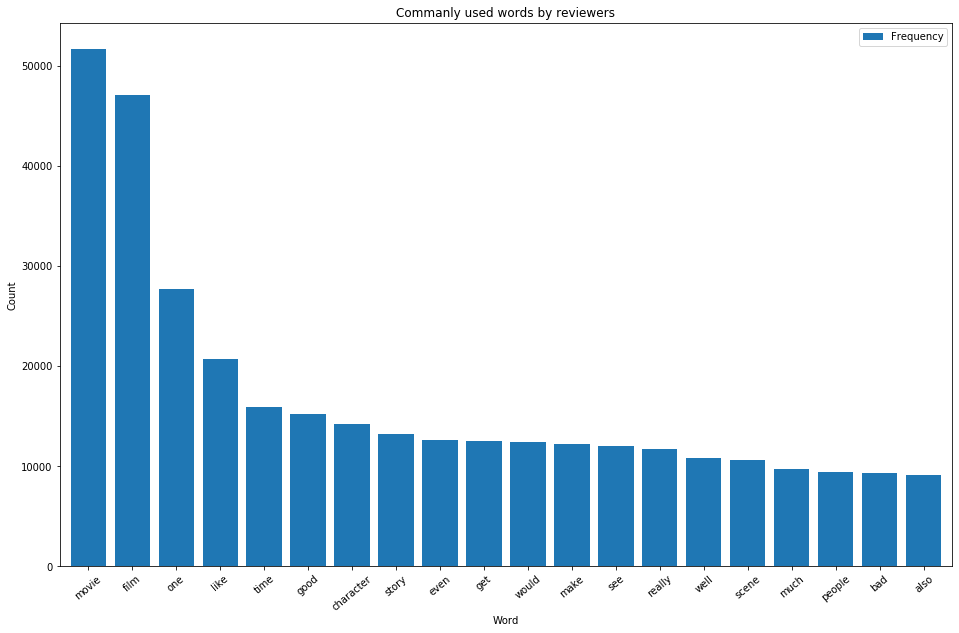

In [24]:
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words by reviewers")
plt.ylabel("Count")

In [25]:
from matplotlib import pyplot

X = np.concatenate((clean_test_data, clean_training_data), axis=0)
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Mean 806.53 words (623.919961)


#### Plot review length
Creating a figure instance

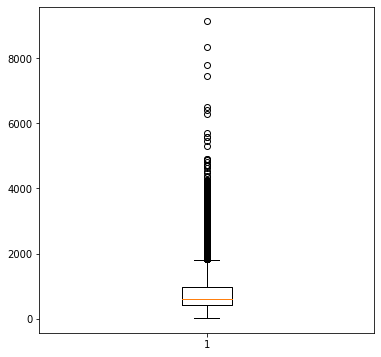

In [26]:
fig = pyplot.figure(1, figsize=(6, 6))
pyplot.boxplot(result)
pyplot.show()

#### PIE CHART

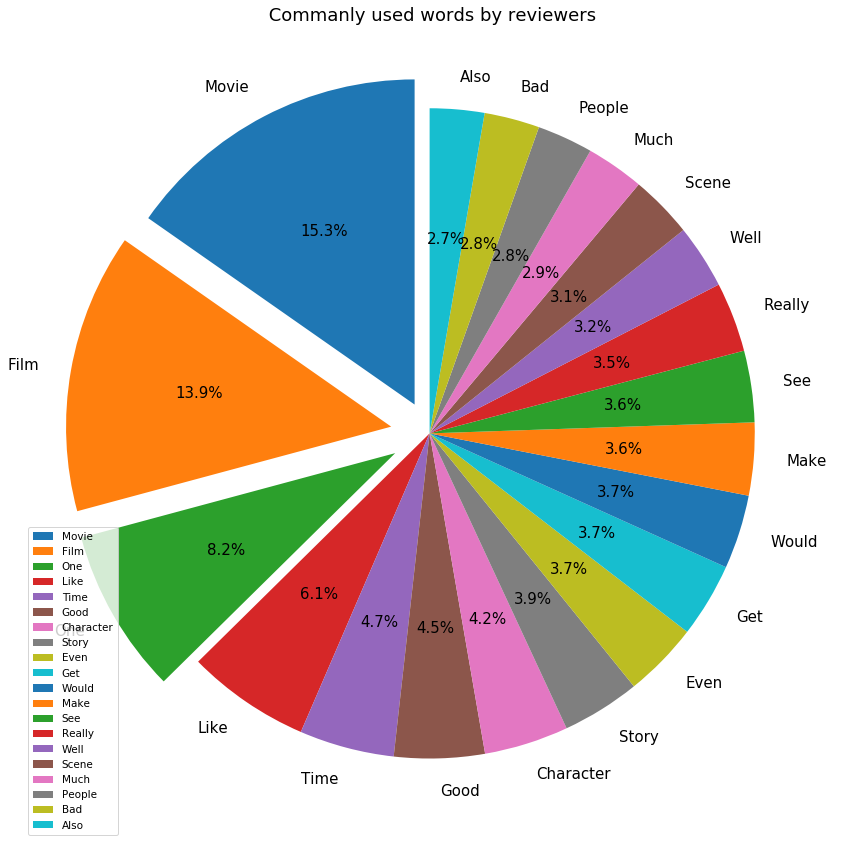

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,35

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)  # explode 1st slice
labels=['Movie','Film','One','Like','Time','Good','Character','Story','Even','Get','Would','Make','See','Really','Well','Scene',
       'Much','People','Bad','Also']

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title(' Commanly used words by reviewers')
plt.show()

In [ ]:
!pip install wordcloud

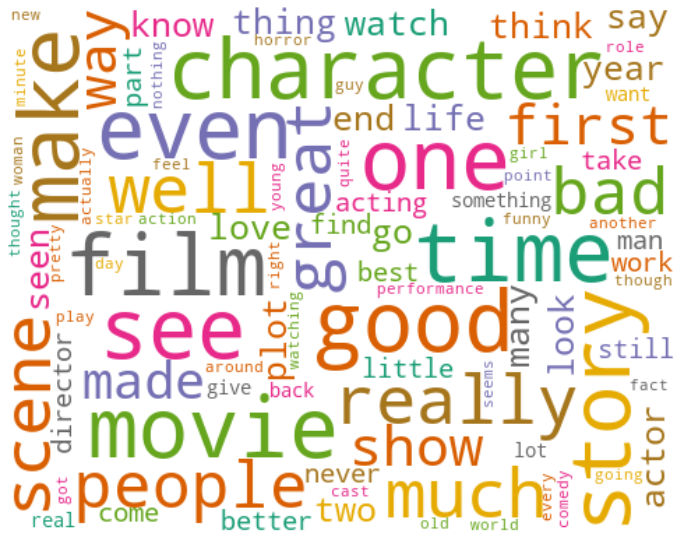

<Figure size 720x720 with 0 Axes>

In [35]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=300, width=480, height=380,colormap="Dark2_r",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

### Create labels for the training data and test data first 12500 are positive and the remaining 12500 are negative

In [36]:
train_labels = np.asarray([1]*len(positive_training_data) + [0]*len(negative_training_data))
test_labels = np.asarray([1]*len(positive_test_data) + [0]*len(negative_test_data))

##### Randomize test data

In [37]:
z = list(zip(clean_training_data, train_labels))
random.shuffle(z)
random_clean_training_data, random_train_labels = zip(*z)

###### Apply feature extraction: countVectorizer which is based on bag of words algorithm

In [38]:
vectorizer = CountVectorizer(ngram_range=(1,2))
train_vector = vectorizer.fit_transform(random_clean_training_data)
test_vector = vectorizer.transform(clean_test_data)

#### Printing some visualization of the sizes of the train and test vectors 
train_vector has 25000 row corresponding to the 25000 review and 74849 feature extracted

In [39]:
print(train_labels.shape)
print(train_vector.shape)

(25000,)
(25000, 1750837)


###### Print shapes of test vector and label

In [40]:
print(test_labels.shape)
print(test_vector.shape)

(25000,)
(25000, 1750837)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

clf = GridSearchCV(tree.DecisionTreeClassifier(),{'max_depth':[1],
                                                  'criterion':['gini','entropy']},cv=5,return_train_score=False)
clf.fit(train_vector, random_train_labels)

In [ ]:
df=pd.DataFrame(clf.cv_results_)
print(df[['param_criterion','param_max_depth','mean_test_score']])

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn import tree

scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=1,criterion='gini'), train_vector, random_train_labels, cv=5)
print(scores*100)
print("Mean Accuracy: %0.2f  (+/- %0.2f deviation) " % (scores.mean()*100, scores.std()))

[62.08 61.7  61.06 60.88 62.4 ]
Mean Accuracy: 61.62  (+/- 0.01 deviation) 


In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10,criterion='gini')
clf.fit(train_vector, random_train_labels)
print("Decision tree classification accuracy:\n",clf.score(test_vector,test_labels)*100,"%")

Decision tree classification accuracy:
 73.408 %
